In [1]:
import sympy
sympy.init_printing()

Thermal Bremsstrahlung

In [5]:
alpha = sympy.Symbol('alpha', positive=True) # Fine structure constant
c = sympy.Symbol('c', positive=True) # Speed of light
m_e = sympy.Symbol('m_e', positive=True) # Electron mass
r_e = sympy.Symbol('r_e', positive=True) # Classical electron radius
k = sympy.Symbol('k', positive=True) # Boltzmann constant
n = sympy.Symbol('n', positive=True) # Number density
T = sympy.Symbol('T', positive=True) # Temperature
bs_emissivity = alpha*(m_e*c**3/r_e**4)*sympy.sqrt(k*T/m_e/c**2)*(n*r_e**3)**2

Matter dominated temperature

In [31]:
m_p = sympy.Symbol('m_p', positive=True) # Proton mas
v = sympy.Symbol('v', positive=True) # Velocity
matter_dominated_temperature = m_p*v**2/k

Radiation dominated temperature

In [52]:
hbar = sympy.Symbol(r'\hbar', positive=True)
radiation_dominated_temperature = sympy.solve(sympy.Eq(n*m_p*v**2, (k*T)**4/c**3/hbar**3),T)[0]

Thermalisation time

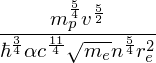

In [34]:
blackbody_photon_density = ((k*T/hbar/c)**3).subs(T, radiation_dominated_temperature)
photon_production_rate = (bs_emissivity/k/T).subs(T, matter_dominated_temperature)
temp = blackbody_photon_density/photon_production_rate
thermalisation_timescale = sympy.expand_power_base(temp, force=True)
thermalisation_timescale

Dimensionless units

In [43]:
tilde_n = sympy.Symbol(r'\tilde{n}')
beta = sympy.Symbol('beta')
chi = sympy.Symbol('chi')
temp = thermalisation_timescale*c/r_e
temp = temp.subs(n, tilde_n/r_e**3)
temp = temp.subs(v, beta*c)
temp = temp.subs(hbar, r_e*m_e*c/alpha)
temp = temp.subs(m_p, chi*m_e)
dimensionless_thermalisation_time = temp

Values for our galactic centre

In [56]:
temp = dimensionless_thermalisation_time
temp = temp.subs(beta, 1.7e-3)
temp = temp.subs(alpha, 1.0/137.0)
temp = temp.subs(chi, 1800)
temp = temp.subs(tilde_n, 6e-37)
temp.n()*2.2e-41

This result is expressed in terms of ages of the universe.

Where the dimensionless density was calculated [here](http://goo.gl/qF9bgH).

The conversion to time in terms of the age of the universe is given [here](http://goo.gl/gBu3Lj)

For comparison the cooling timescale is

In [60]:
temp = n*k*T/(bs_emissivity)
temp = temp.subs(T, matter_dominated_temperature)
cooling_timescale = temp

Dimensionless form

In [66]:
temp = (c/r_e)*cooling_timescale
temp = temp.subs(v, beta*c)
temp = temp.subs(m_p, chi*m_e)
temp = temp.subs(n, tilde_n/r_e**3)
dimensionless_cooling_time = temp

Values for our galactic centre

In [72]:
temp = dimensionless_cooling_time
temp = temp.subs(beta, 1.7e-3)
temp = temp.subs(alpha, 1.0/137.0)
temp = temp.subs(chi, 1800)
temp = temp.subs(tilde_n, 6e-37)
temp.n()*2.2e-41*1e10

This time, answer is in years